In [1]:
import pandas as pd
import numpy as np
import geatpy as ea
from multiprocessing import Pool as ProcessPool
import multiprocessing as mp
from multiprocessing.dummy import Pool as ThreadPool

gen|  eval  |      gd     |     igd     |      hv     |   spacing   
--------------------------------------------------------------------
 0 |   50   |     None    |     None    | 6.85282E-01 | 4.69379E-01 
 1 |  100   |     None    |     None    | 7.61359E-01 | 3.47703E-01 
 2 |  150   |     None    |     None    | 7.44839E-01 | 1.76314E-01 
 3 |  200   |     None    |     None    | 7.94947E-01 | 1.11044E-01 
 4 |  250   |     None    |     None    | 8.16030E-01 | 6.90167E-02 
 5 |  300   |     None    |     None    | 8.19374E-01 | 3.94765E-02 
 6 |  350   |     None    |     None    | 8.26326E-01 | 3.67110E-02 
 7 |  400   |     None    |     None    | 8.26646E-01 | 3.70794E-02 
 8 |  450   |     None    |     None    | 8.28096E-01 | 4.67715E-02 
 9 |  500   |     None    |     None    | 8.30017E-01 | 4.32678E-02 
 10|  550   |     None    |     None    | 8.30139E-01 | 3.99332E-02 
 11|  600   |     None    |     None    | 8.30438E-01 | 3.93243E-02 
 12|  650   |     None    |     No

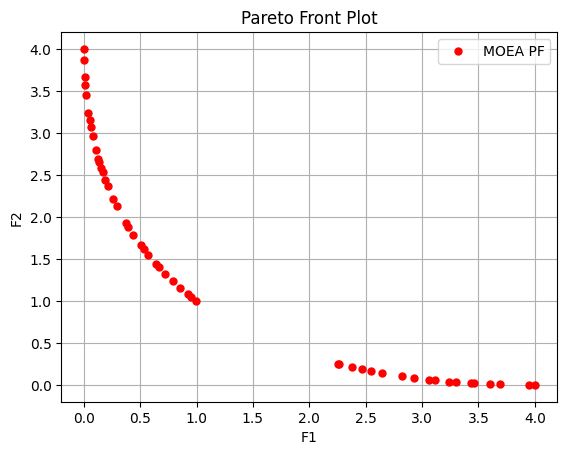

Execution time: 0.07798123359680176 s
Evaluation number: 10000
The number of non-dominated solutions is: 50
hv: 0.83020
spacing: 0.03503


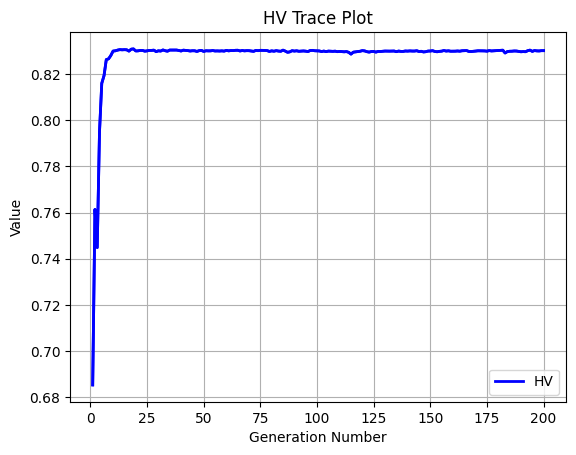

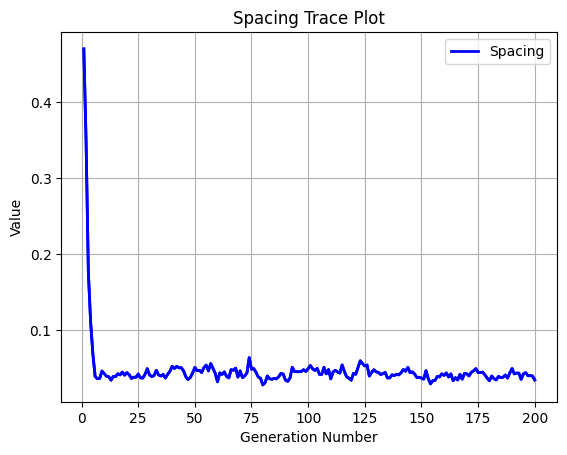

In [3]:
class MyProblem(ea.Problem):  # 继承Problem父类
    def __init__(self):
        name = 'MyProblem'  # 初始化name（函数名称，可以随意设置）
        M = 2  # 优化目标个数
        maxormins = [1] * M  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 1  # 初始化Dim（决策变量维数）
        varTypes = [0]  # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [-10]  # 决策变量下界
        ub = [10]  # 决策变量上界
        lbin = [1]  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1]  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)

    def evalVars(self, Vars):  # 目标函数
        f1 = Vars ** 2
        f2 = (Vars - 2) ** 2
        ObjV = np.hstack([f1, f2])  # 计算目标函数值矩阵
        CV = -Vars ** 2 + 2.5 * Vars - 1.5  # 构建违反约束程度矩阵
        return ObjV, CV

# 实例化问题对象
problem = MyProblem()
# 构建算法
algorithm = ea.moea_NSGA2_templet(problem,
                                    ea.Population(Encoding='RI', NIND=50),
                                    MAXGEN=200,  # 最大进化代数
                                    logTras=1)  # 表示每隔多少代记录一次日志信息，0表示不记录。
# 求解
res = ea.optimize(algorithm, seed=1, verbose=True, drawing=1, outputMsg=True, drawLog=True, saveFlag=False, dirName='result')
